<a href="https://colab.research.google.com/github/Atikahdr/CyberBullyingTweet/blob/main/CyberBullying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 43.4 MB/s eta 0:00:00


In [ ]:
import sys
print("Python:", sys.version)

Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


## # 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
import os
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns

# text processing
import re
import nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
print(stopwords.words('english'))
print(stopwords.words('indonesian'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
# Dataset Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# ML Modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# ML Model Evaluation
from sklearn.model_selection import cross_val_score

## 2. Connect G-Drive

In [ ]:
cyber_data = pd.read_csv("/content/drive/MyDrive/DScience-Project/Cyber Bullying/cyberbullying_tweets.csv")
cyber_data

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [ ]:
cyber_data.shape

(47692, 2)

In [ ]:
cyber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [ ]:
cyber_data.describe()

,tweet_text,cyberbullying_type
count,47692,47692
unique,46017,6
top,MARINATED IN GATER TEARS,religion
freq,2,7998


In [ ]:
print("Missing Value:", cyber_data.isnull().sum())
print("Jumlah Duplikat:", cyber_data.duplicated().sum())
duplicates_full = cyber_data[cyber_data.duplicated(keep=False)]
print(duplicates_full.sort_values(by='tweet_text').head(20))

Missing Value: tweet_text            0
cyberbullying_type    0
dtype: int64
Jumlah Duplikat: 36
                                              tweet_text cyberbullying_type
8623   @ErikssonMalin85: #QuestionsForMen ever walked...             gender
13830  @ErikssonMalin85: #QuestionsForMen ever walked...             gender
14760  @ErikssonMalin85: Have u ever expressed ur ang...             gender
10891  @ErikssonMalin85: Have u ever expressed ur ang...             gender
7822   @Ima_TV_Junkie: What the hell were Annie and L...  not_cyberbullying
6358   @Ima_TV_Junkie: What the hell were Annie and L...  not_cyberbullying
15420  @MHWitchfinder: Please, if you disagree with H...             gender
12447  @MHWitchfinder: Please, if you disagree with H...             gender
1984   @TVWEEKmag: There is only 1 way to stay in the...  not_cyberbullying
7278   @TVWEEKmag: There is only 1 way to stay in the...  not_cyberbullying
10766  @Transic_nyc: What do u think her punishment s...            

In [ ]:
print("Data before drop:", len(cyber_data))
cydata_clean = cyber_data.drop_duplicates()
print("Data after drop:", len(cydata_clean))
print(cydata_clean['cyberbullying_type'].value_counts())

Data before drop: 47692
Data after drop: 47656
cyberbullying_type
religion               7997
age                    7992
ethnicity              7959
gender                 7948
not_cyberbullying      7937
other_cyberbullying    7823
Name: count, dtype: int64


## Data Exploration

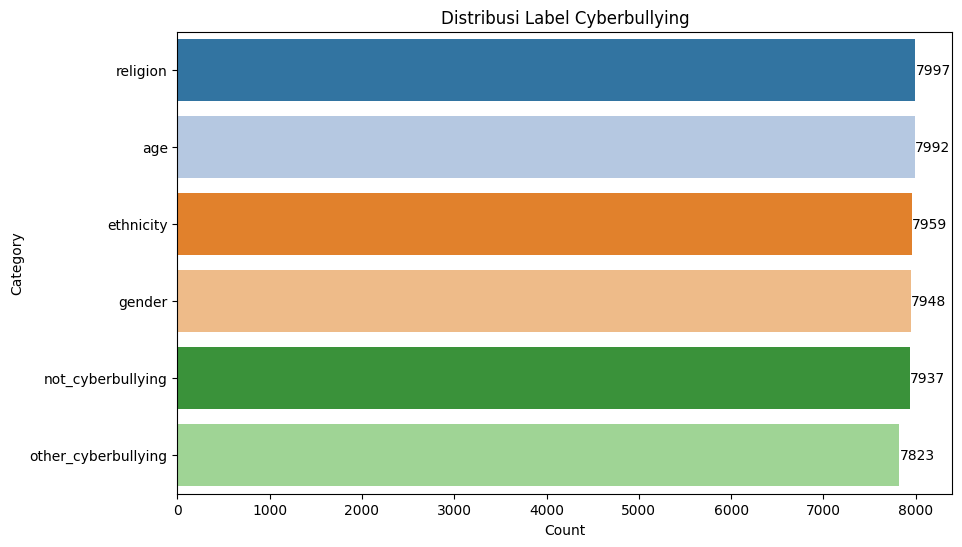

In [ ]:
# Label Distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    y=cydata_clean['cyberbullying_type'],
    order=cydata_clean['cyberbullying_type'].value_counts().index,
    palette="tab20")

#Label of number
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title("Distribusi Label Cyberbullying")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()


Distribusi label pada dataset cyberbullying relatif merata di enam kategori utama. Tidak ditemukan masalah ketidakseimbangan kelas yang signifikan. Hal ini menguntungkan karena model tidak perlu penanganan khusus terkait imbalance, sehingga hasil prediksi diharapkan lebih konsisten di semua kategori.

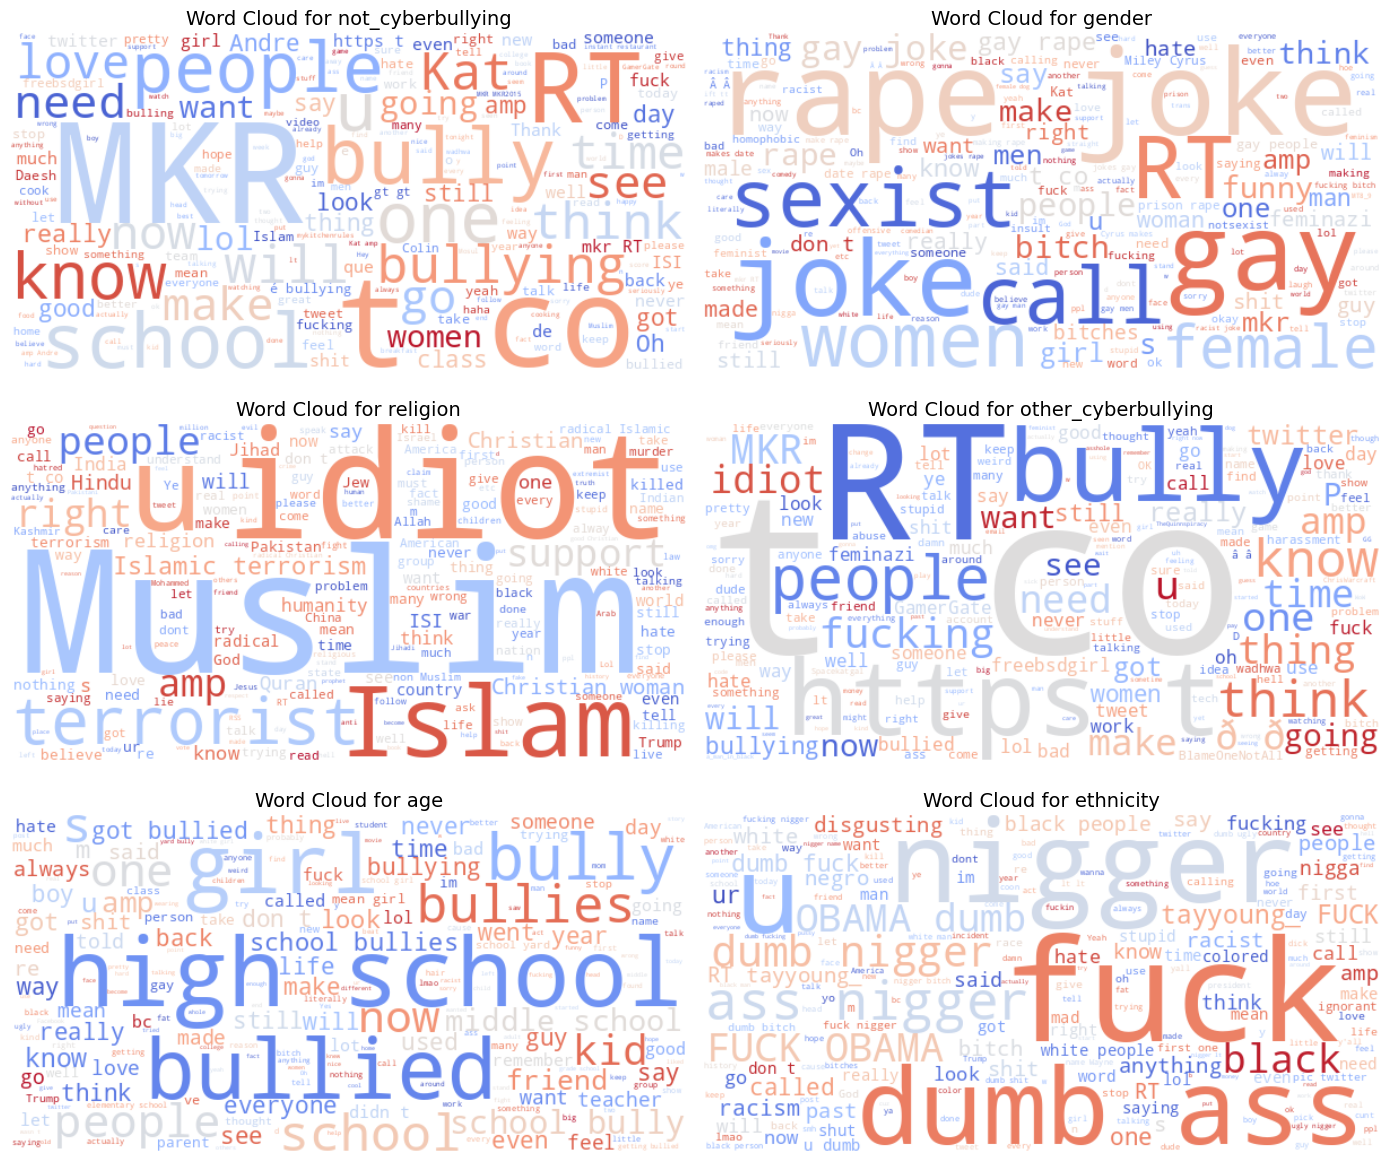

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Check data
classes = cydata_clean['cyberbullying_type'].unique()

# 3 rows, 2 columns feature
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

# Loop class
for i, c in enumerate(classes):
    # Combine all tweets for the class
    text = " ".join(cydata_clean[cydata_clean['cyberbullying_type'] == c]['tweet_text'].astype(str))

    # WordCloud
    wc = WordCloud(
        width=600,
        height=300,
        background_color="white",
        colormap="coolwarm",
        prefer_horizontal=1.0,
        max_words=200
    ).generate(text)

    # Subplot
    axes[i].imshow(wc, interpolation="bilinear")
    axes[i].set_title(f"Word Cloud for {c}", fontsize=14)
    axes[i].axis("off")

# Hide empty subplots if the number of classes is less than 6
for j in range(len(classes), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


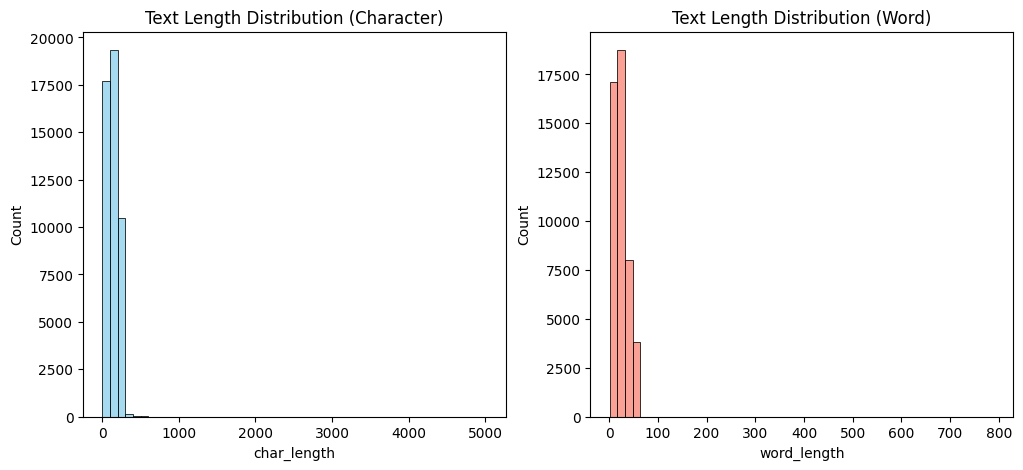

In [ ]:
#Text Length Distribution
cydata_clean['char_length'] = cydata_clean['tweet_text'].astype(str).apply(len)
cydata_clean['word_length'] = cydata_clean['tweet_text'].astype(str).apply(lambda x: len(x.split()))

fig, axes = plt.subplots(1,2, figsize=(12, 5))
sns.histplot(cydata_clean['char_length'], bins=50, ax=axes[0], color="skyblue")
axes[0].set_title("Text Length Distribution (Character)")

sns.histplot(cydata_clean['word_length'], bins=50, ax=axes[1], color="salmon")
axes[1].set_title("Text Length Distribution (Word)")
plt.show()

In [ ]:
cydata_clean.head(10)

,tweet_text,cyberbullying_type,char_length,word_length
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61,9
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115,14
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60,9
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103,18
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103,18
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying,131,23
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying,54,10
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying,63,14
8,@stockputout everything but mostly my priest,not_cyberbullying,44,6
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying,50,9


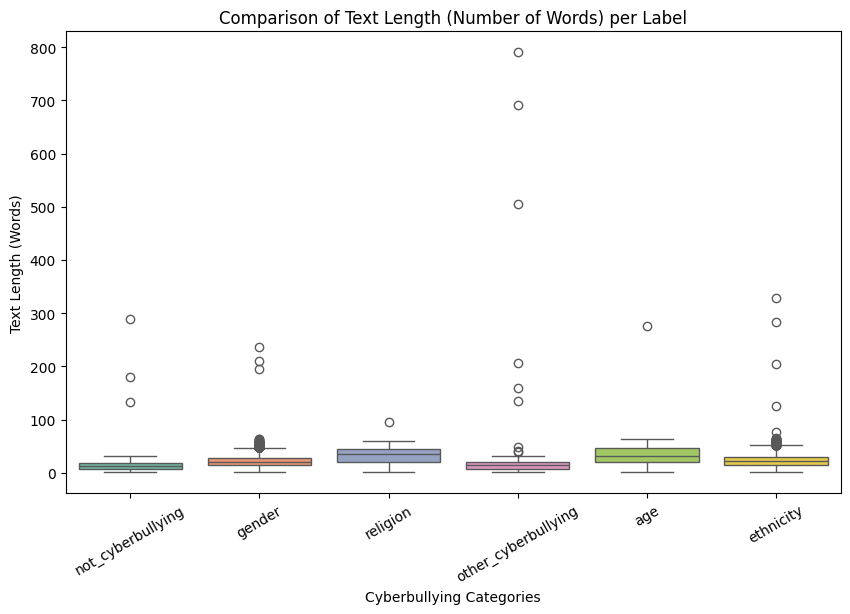

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="cyberbullying_type",
            y="word_length",
            data=cydata_clean,
            palette="Set2")

plt.title("Comparison of Text Length (Number of Words) per Label")
plt.xlabel("Cyberbullying Categories")
plt.ylabel("Text Length (Words)")
plt.xticks(rotation=30)
plt.show()


In [ ]:
cydata_clean[cydata_clean['word_length'] > 500][['tweet_text', 'cyberbullying_type', 'word_length']]


,tweet_text,cyberbullying_type,word_length
24516,@NICKIMINAJ: #WutKinda\r\nAt this rate the MKR...,other_cyberbullying,692
29205,is feminazi an actual word with a denot…\r\n@N...,other_cyberbullying,790
30752,I don't retreat.\r\nyessssssss http://t.co/Td9...,other_cyberbullying,505


In [ ]:
from scipy.stats import f_oneway

groups = [group["char_length"].values for name, group in cydata_clean.groupby("cyberbullying_type")]
stat, p = f_oneway(*groups)

print(f"ANOVA Statistic: {stat:.2f}")
print(f"p-value: {p:.10f}")

if p < 0.05:
    print("✅ There are significant differences in character length between types of cyberbullying.")
else:
    print("❌ There was no significant difference in character length between different types of cyberbullying.")


ANOVA Statistic: 3055.59
p-value: 0.0000000000
✅ There are significant differences in character length between types of cyberbullying.


* This number indicates how large the average difference between groups (here: between cyberbullying_type categories) is compared to the variation within groups. A large value (such as 3055) means the difference is strong and clear.

* p-value: 0.0000000000 This means the p-value is less than 0.00000000005 (or less than 1e-10).
➜ It's very small, so the difference between categories is statistically significant. straightforward and direct.

* Based on the ANOVA test results (F = 3055.59, p < 0.001), there is a significant difference in character length between types of cyberbullying. This indicates that certain types of attacks (such as religious or other forms of cyberbullying) tend to have longer texts compared to others.

Is there a significant difference in character length (char_length) between different types of cyberbullying.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=cydata_clean['char_length'],
                          groups=cydata_clean['cyberbullying_type'],
                          alpha=0.05)
print(tukey)


              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1              group2       meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------------------
                age           ethnicity -34.2391    0.0 -37.5869 -30.8913   True
                age              gender -37.0399    0.0 -40.3889 -33.6909   True
                age   not_cyberbullying -90.4564    0.0 -93.8065 -87.1062   True
                age other_cyberbullying -87.8288    0.0 -91.1911 -84.4664   True
                age            religion  24.4402    0.0  21.0964   27.784   True
          ethnicity              gender  -2.8008 0.1629  -6.1532   0.5517  False
          ethnicity   not_cyberbullying -56.2173    0.0 -59.5709 -52.8636   True
          ethnicity other_cyberbullying -53.5896    0.0 -56.9555 -50.2238   True
          ethnicity            religion  58.6793    0.0   55.332  62.0266   True
             gender   not_cy

Based on the results of the Tukey HSD test (α = 0.05), there is a significant difference in character length between types of cyberbullying.
The religion category has the highest average text length, while age has the shortest.
The differences between not_cyberbullying and other_cyberbullying, as well as between gender and ethnicity, are not significant.
This indicates that the context of attacks against religion tends to require longer sentences (e.g., arguments or insinuations), while age and gender attacks are shorter and more direct.

# Text Processing

## Text Cleaning

In [ ]:
# Defining a function to clean up the text
def clean_text(text):

  # Removing URL
  text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

  # Remove mention & hashtag
  text = re.sub(r'@\w+', '', text)

  # Remove only '#' symbol but keep the word (e.g. #mkr -> mkr)
  text = re.sub(r'#\w+', '', text)

  # hapus tag seperti <tsui-ji>
  text = re.sub(r'<.*?>', '', text)

  # Remove Number
  text = re.sub(r'\d+', '', text)

  # Remove karakter selain huruf
  text = re.sub(r'[^a-zA-Z\s]', '', text)

  # Converting to lowecase
  text = text.lower()

  # Splitting text (check the defaults of split func!)
  text = text.split()

   # Rejoining text
  text = ' '.join(text)

  return text

In [ ]:
cydata_clean["cleaned_text"] = cydata_clean["tweet_text"].apply(clean_text)

# Lets have a look at a sample of texts after cleaning
print("The First 10 texts after cleaning: \n")
print(*cydata_clean["cleaned_text"][:10], sep="\n")

The First 10 texts after cleaning: 

in other words your food was crapilicious
why is so white
a classy whore or more red velvet cupcakes
meh p thanks for the heads up but not too concerned about another angry dude on twitter
this is an isis account pretending to be a kurdish account like islam it is all lies
yes the test of god is that good or bad or indifferent or weird or whatever it all proves gods existence
itu sekolah ya bukan tempat bully ga jauh kaya neraka
karma i hope it bites kat on the butt she is just nasty
everything but mostly my priest
rebecca black drops out of school due to bullying


In [ ]:
print(*cydata_clean["tweet_text"][:10], sep="\n")

In other words #katandandre, your food was crapilicious! #mkr
Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc
@XochitlSuckkks a classy whore? Or more red velvet cupcakes?
@Jason_Gio meh. :P  thanks for the heads up, but not too concerned about another angry dude on twitter.
@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account.  Like Islam, it is all lies.
@Raja5aab @Quickieleaks Yes, the test of god is that good or bad or indifferent or weird or whatever, it all proves gods existence.
Itu sekolah ya bukan tempat bully! Ga jauh kaya neraka
Karma. I hope it bites Kat on the butt. She is just nasty. #mkr
@stockputout everything but mostly my priest
Rebecca Black Drops Out of School Due to Bullying:


In [ ]:
n_doc = 21
print("Original:", cydata_clean['tweet_text'][n_doc])
print("Cleaned:", cydata_clean['cleaned_text'][n_doc])

Original: Kids Love😘❤ @ Mohamad Bin Zayed City مدينة محمد بن زايد http://t.co/0xrOZSNn
Cleaned: kids love mohamad bin zayed city


# Tokenization

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
cydata_clean['tokenized_text'] = cydata_clean.apply(
    lambda row: nltk.word_tokenize(row["cleaned_text"]),
    axis=1
)
cydata_clean.head(10)

,tweet_text,cyberbullying_type,char_length,word_length,cleaned_text,tokenized_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61,9,in other words your food was crapilicious,"[in, other, words, your, food, was, crapilicious]"
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115,14,why is so white,"[why, is, so, white]"
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60,9,a classy whore or more red velvet cupcakes,"[a, classy, whore, or, more, red, velvet, cupc..."
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103,18,meh p thanks for the heads up but not too conc...,"[meh, p, thanks, for, the, heads, up, but, not..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103,18,this is an isis account pretending to be a kur...,"[this, is, an, isis, account, pretending, to, ..."
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying,131,23,yes the test of god is that good or bad or ind...,"[yes, the, test, of, god, is, that, good, or, ..."
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying,54,10,itu sekolah ya bukan tempat bully ga jauh kaya...,"[itu, sekolah, ya, bukan, tempat, bully, ga, j..."
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying,63,14,karma i hope it bites kat on the butt she is j...,"[karma, i, hope, it, bites, kat, on, the, butt..."
8,@stockputout everything but mostly my priest,not_cyberbullying,44,6,everything but mostly my priest,"[everything, but, mostly, my, priest]"
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying,50,9,rebecca black drops out of school due to bullying,"[rebecca, black, drops, out, of, school, due, ..."


# Remove Stopwords

In [ ]:
# Removing the stopwords function
def remove_stopwords(text, lang=("english", "indonesian")):
    # Ambil stopwords dari NLTK
    stop_words = set()
    for l in lang:
        stop_words.update(stopwords.words(l))

    # Tambahkan custom stopwords (kata tidak bermakna di media sosial)
    custom_stopwords = {'meh', 'umm', 'hmm', 'lol', 'haha', 'p', 'ya', 'ga'}

    stop_words.update(custom_stopwords)
    # Gabungkan dengan custom stopwords
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

In [ ]:
cydata_clean["no_stopword_text"] = cydata_clean["tokenized_text"].apply(remove_stopwords)

print("The First 10 Texts after removing the stopword: \n")
print(*cydata_clean["no_stopword_text"][:10], sep="\n")

The First 10 Texts after removing the stopword: 

['words', 'food', 'crapilicious']
['white']
['classy', 'whore', 'red', 'velvet', 'cupcakes']
['thanks', 'heads', 'concerned', 'another', 'angry', 'dude', 'twitter']
['isis', 'account', 'pretending', 'kurdish', 'account', 'like', 'islam', 'lies']
['yes', 'test', 'god', 'good', 'bad', 'indifferent', 'weird', 'whatever', 'proves', 'gods', 'existence']
['sekolah', 'bully', 'kaya', 'neraka']
['karma', 'hope', 'bites', 'kat', 'butt', 'nasty']
['everything', 'mostly', 'priest']
['rebecca', 'black', 'drops', 'school', 'due', 'bullying']


In [ ]:
print(*cydata_clean["tokenized_text"][:10], sep="\n")

['in', 'other', 'words', 'your', 'food', 'was', 'crapilicious']
['why', 'is', 'so', 'white']
['a', 'classy', 'whore', 'or', 'more', 'red', 'velvet', 'cupcakes']
['meh', 'p', 'thanks', 'for', 'the', 'heads', 'up', 'but', 'not', 'too', 'concerned', 'about', 'another', 'angry', 'dude', 'on', 'twitter']
['this', 'is', 'an', 'isis', 'account', 'pretending', 'to', 'be', 'a', 'kurdish', 'account', 'like', 'islam', 'it', 'is', 'all', 'lies']
['yes', 'the', 'test', 'of', 'god', 'is', 'that', 'good', 'or', 'bad', 'or', 'indifferent', 'or', 'weird', 'or', 'whatever', 'it', 'all', 'proves', 'gods', 'existence']
['itu', 'sekolah', 'ya', 'bukan', 'tempat', 'bully', 'ga', 'jauh', 'kaya', 'neraka']
['karma', 'i', 'hope', 'it', 'bites', 'kat', 'on', 'the', 'butt', 'she', 'is', 'just', 'nasty']
['everything', 'but', 'mostly', 'my', 'priest']
['rebecca', 'black', 'drops', 'out', 'of', 'school', 'due', 'to', 'bullying']


In [ ]:
cydata_clean

,tweet_text,cyberbullying_type,char_length,word_length,cleaned_text,tokenized_text,no_stopword_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61,9,in other words your food was crapilicious,"[in, other, words, your, food, was, crapilicious]","[words, food, crapilicious]"
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115,14,why is so white,"[why, is, so, white]",[white]
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60,9,a classy whore or more red velvet cupcakes,"[a, classy, whore, or, more, red, velvet, cupc...","[classy, whore, red, velvet, cupcakes]"
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103,18,meh p thanks for the heads up but not too conc...,"[meh, p, thanks, for, the, heads, up, but, not...","[thanks, heads, concerned, another, angry, dud..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103,18,this is an isis account pretending to be a kur...,"[this, is, an, isis, account, pretending, to, ...","[isis, account, pretending, kurdish, account, ..."
...,...,...,...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,234,42,black ppl arent expected to do anything depend...,"[black, ppl, arent, expected, to, do, anything...","[black, ppl, arent, expected, anything, depend..."
47688,Turner did not withhold his disappointment. Tu...,ethnicity,276,45,turner did not withhold his disappointment tur...,"[turner, did, not, withhold, his, disappointme...","[turner, withhold, disappointment, turner, cal..."
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,104,20,i swear to god this dumb nigger bitch i have g...,"[i, swear, to, god, this, dumb, nigger, bitch,...","[swear, god, dumb, nigger, bitch, got, bleach,..."
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,90,15,yea fuck you rt if youre a nigger fucking unfo...,"[yea, fuck, you, rt, if, youre, a, nigger, fuc...","[yea, fuck, rt, youre, nigger, fucking, unfoll..."


# Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()

# lemmatizer string function
def lemmatize_word(text):
  # provide context i.e part-of-speech (pos)
  lemmas = [lemmatizer.lemmatize(word, pos='v') for word in text]
  return lemmas

In [ ]:
cydata_clean["lemmatized_text"] = cydata_clean["no_stopword_text"].apply(lemmatize_word)

print("The First 10 Texts after lemmitization: \n")
print(*cydata_clean["lemmatized_text"][:10], sep="\n")

The First 10 Texts after lemmitization: 

['word', 'food', 'crapilicious']
['white']
['classy', 'whore', 'red', 'velvet', 'cupcakes']
['thank', 'head', 'concern', 'another', 'angry', 'dude', 'twitter']
['isis', 'account', 'pretend', 'kurdish', 'account', 'like', 'islam', 'lie']
['yes', 'test', 'god', 'good', 'bad', 'indifferent', 'weird', 'whatever', 'prove', 'gods', 'existence']
['sekolah', 'bully', 'kaya', 'neraka']
['karma', 'hope', 'bite', 'kat', 'butt', 'nasty']
['everything', 'mostly', 'priest']
['rebecca', 'black', 'drop', 'school', 'due', 'bully']


In [ ]:
cydata_clean

,tweet_text,cyberbullying_type,char_length,word_length,cleaned_text,tokenized_text,no_stopword_text,lemmatized_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61,9,in other words your food was crapilicious,"[in, other, words, your, food, was, crapilicious]","[words, food, crapilicious]","[word, food, crapilicious]"
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115,14,why is so white,"[why, is, so, white]",[white],[white]
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60,9,a classy whore or more red velvet cupcakes,"[a, classy, whore, or, more, red, velvet, cupc...","[classy, whore, red, velvet, cupcakes]","[classy, whore, red, velvet, cupcakes]"
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103,18,meh p thanks for the heads up but not too conc...,"[meh, p, thanks, for, the, heads, up, but, not...","[thanks, heads, concerned, another, angry, dud...","[thank, head, concern, another, angry, dude, t..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103,18,this is an isis account pretending to be a kur...,"[this, is, an, isis, account, pretending, to, ...","[isis, account, pretending, kurdish, account, ...","[isis, account, pretend, kurdish, account, lik..."
...,...,...,...,...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,234,42,black ppl arent expected to do anything depend...,"[black, ppl, arent, expected, to, do, anything...","[black, ppl, arent, expected, anything, depend...","[black, ppl, arent, expect, anything, depend, ..."
47688,Turner did not withhold his disappointment. Tu...,ethnicity,276,45,turner did not withhold his disappointment tur...,"[turner, did, not, withhold, his, disappointme...","[turner, withhold, disappointment, turner, cal...","[turner, withhold, disappointment, turner, cal..."
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,104,20,i swear to god this dumb nigger bitch i have g...,"[i, swear, to, god, this, dumb, nigger, bitch,...","[swear, god, dumb, nigger, bitch, got, bleach,...","[swear, god, dumb, nigger, bitch, get, bleach,..."
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,90,15,yea fuck you rt if youre a nigger fucking unfo...,"[yea, fuck, you, rt, if, youre, a, nigger, fuc...","[yea, fuck, rt, youre, nigger, fucking, unfoll...","[yea, fuck, rt, youre, nigger, fuck, unfollow,..."


# Vectorization

## Creating a corpus of lemmatized text

In [ ]:
# Creating a corpus of text feature to encode further into vectorized form
corpus = []
for i in cydata_clean["lemmatized_text"]:
  twt = ' '.join([row for row in i])
  corpus.append(twt)

print("The First 10 lines in corpus : \n")
print(*corpus[:10], sep="\n")

The First 10 lines in corpus : 

word food crapilicious
white
classy whore red velvet cupcakes
thank head concern another angry dude twitter
isis account pretend kurdish account like islam lie
yes test god good bad indifferent weird whatever prove gods existence
sekolah bully kaya neraka
karma hope bite kat butt nasty
everything mostly priest
rebecca black drop school due bully


In [ ]:
cydata_clean.head()

,tweet_text,cyberbullying_type,char_length,word_length,cleaned_text,tokenized_text,no_stopword_text,lemmatized_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,61,9,in other words your food was crapilicious,"[in, other, words, your, food, was, crapilicious]","[words, food, crapilicious]","[word, food, crapilicious]"
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,115,14,why is so white,"[why, is, so, white]",[white],[white]
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,60,9,a classy whore or more red velvet cupcakes,"[a, classy, whore, or, more, red, velvet, cupc...","[classy, whore, red, velvet, cupcakes]","[classy, whore, red, velvet, cupcakes]"
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,103,18,meh p thanks for the heads up but not too conc...,"[meh, p, thanks, for, the, heads, up, but, not...","[thanks, heads, concerned, another, angry, dud...","[thank, head, concern, another, angry, dude, t..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,103,18,this is an isis account pretending to be a kur...,"[this, is, an, isis, account, pretending, to, ...","[isis, account, pretending, kurdish, account, ...","[isis, account, pretend, kurdish, account, lik..."


## Converting the corpus in vector form

In [ ]:
# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=40000, ngram_range=(1,2), stop_words='english')
X = tfidf.fit_transform(corpus)

print("TF-IDF shape:", X.shape)

TF-IDF shape: (47656, 40000)


## Label Encoding the classes in Target

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encode the target and use it as y
le = LabelEncoder()
cydata_clean["cyberbullying_type"] = le.fit_transform(cydata_clean["cyberbullying_type"])

In [ ]:
cydata_clean.head()

,tweet_text,cyberbullying_type,char_length,word_length,cleaned_text,tokenized_text,no_stopword_text,lemmatized_text
0,"In other words #katandandre, your food was cra...",3,61,9,in other words your food was crapilicious,"[in, other, words, your, food, was, crapilicious]","[words, food, crapilicious]","[word, food, crapilicious]"
1,Why is #aussietv so white? #MKR #theblock #ImA...,3,115,14,why is so white,"[why, is, so, white]",[white],[white]
2,@XochitlSuckkks a classy whore? Or more red ve...,3,60,9,a classy whore or more red velvet cupcakes,"[a, classy, whore, or, more, red, velvet, cupc...","[classy, whore, red, velvet, cupcakes]","[classy, whore, red, velvet, cupcakes]"
3,"@Jason_Gio meh. :P thanks for the heads up, b...",3,103,18,meh p thanks for the heads up but not too conc...,"[meh, p, thanks, for, the, heads, up, but, not...","[thanks, heads, concerned, another, angry, dud...","[thank, head, concern, another, angry, dude, t..."
4,@RudhoeEnglish This is an ISIS account pretend...,3,103,18,this is an isis account pretending to be a kur...,"[this, is, an, isis, account, pretending, to, ...","[isis, account, pretending, kurdish, account, ...","[isis, account, pretend, kurdish, account, lik..."


In [ ]:
for label, class_name in enumerate(le.classes_):
    print(f"{label} → {class_name}")


0 → age
1 → ethnicity
2 → gender
3 → not_cyberbullying
4 → other_cyberbullying
5 → religion


# Model Building

In [ ]:
# Setting values for cyberbullying_type and feature as y and x ( we already did X in vectorizing...)
X_text = cydata_clean["lemmatized_text"].astype(str)
y = cydata_clean["cyberbullying_type"]

# Splitting the testing and training sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (38124, 40000)
Test shape: (9532, 40000)


In [ ]:
display(y_train.value_counts(normalize=True))
display(y_test.value_counts(normalize=True))

,proportion
cyberbullying_type,
5,0.167795
0,0.167716
1,0.167008
2,0.166772
3,0.166562
4,0.164149


,proportion
cyberbullying_type,
5,0.167856
0,0.167646
1,0.167016
2,0.166807
3,0.166492
4,0.164184


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# 1 XGBOOST
print("XGBoost Model\n")
xgb = XGBClassifier(random_state=0)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred_xgb)*100,2))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_xgb, multi_class='ovr', average='macro')*100,2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# 2. Logistic Regression
print("\nLogistic Regression")
log_reg = LogisticRegression(solver='saga', random_state=42, class_weight='balanced', multi_class='ovr')
log_reg.fit(X_train, y_train)

# Predicting the Test set results
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)

# Evaluate Results
print("Accuracy:", round(accuracy_score(y_test, y_pred_log)*100,2))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_log, multi_class='ovr', average='macro')*100,2))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# 3. Random Forest
print("\nRandom Forest")

# Fitting Random Forest to the Training set:
rf = RandomForestClassifier(n_estimators=50, random_state=0, class_weight='balanced', max_depth=10)
rf.fit(X_train, y_train)

# Predicting the Test set results
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)

# Evaluate Result
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf)*100,2))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_rf, multi_class='ovr', average='macro')*100,2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))



XGBoost Model

Accuracy: 81.38
ROC AUC: 96.59

Confusion Matrix:
 [[1543    6    0   40    9    0]
 [   2 1537    6   29   17    1]
 [   2    9 1293  161  124    1]
 [  18    9   53 1005  465   37]
 [   5    9   63  607  877    4]
 [   0    3    8   60   27 1502]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      1598
           1       0.98      0.97      0.97      1592
           2       0.91      0.81      0.86      1590
           3       0.53      0.63      0.58      1587
           4       0.58      0.56      0.57      1565
           5       0.97      0.94      0.96      1600

    accuracy                           0.81      9532
   macro avg       0.82      0.81      0.82      9532
weighted avg       0.83      0.81      0.82      9532


Logistic Regression
Accuracy: 80.18
ROC AUC: 96.24

Confusion Matrix: 
 [[1546    7    2   21   22    0]
 [   5 1528    7   17   32    3]
 [   7   14 1282  143  138  

In [ ]:
# 4. Naive Bayes
print("\nNaive Bayes Performance")

# Fitting Logistic Regression to the Training set
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)
y_prob_nb = nb_model.predict_proba(X_test)

# Evaluate Results
print("Accuracy:", round(accuracy_score(y_test, y_pred_nb)*100,2))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_nb, multi_class='ovr', average='macro')*100,2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\n classification_report:\n", classification_report(y_test, y_pred_nb))

# 5. Gradient Boosting
print("\nGradient Boosting")
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred_gb)*100,2))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_gb, multi_class='ovr', average='macro')*100,2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

# 6. Support Vector Machine (SVM)
print("\nSupport Vector Machine")
svm = SVC(probability=True, random_state=0, class_weight='balanced', kernel='rbf')
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred_svm)*100,2))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_svm, multi_class='ovr', average='macro')*100,2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassificaation Report:\n", classification_report(y_test, y_pred_svm))


Naive Bayes Performance
Accuracy: 74.87
ROC AUC: 95.51

Confusion Matrix:
 [[1578    6    1    2    6    5]
 [  31 1444   17   17   25   58]
 [  31   48 1282   88   87   54]
 [ 217   70   94  574  412  220]
 [ 186  102  140  269  700  168]
 [   7   13    7    9    5 1559]]

 classification_report:
               precision    recall  f1-score   support

           0       0.77      0.99      0.87      1598
           1       0.86      0.91      0.88      1592
           2       0.83      0.81      0.82      1590
           3       0.60      0.36      0.45      1587
           4       0.57      0.45      0.50      1565
           5       0.76      0.97      0.85      1600

    accuracy                           0.75      9532
   macro avg       0.73      0.75      0.73      9532
weighted avg       0.73      0.75      0.73      9532


Gradient Boosting
Accuracy: 79.55
ROC AUC: 96.15

Confusion Matrix:
 [[1520    6    3   51   18    0]
 [   0 1533    7   10   42    0]
 [   1    8 1259   6


Model Comparison Results (Multiclass):
                 Model  Accuracy  ROC AUC  Precision  Recall  F1 Score  \
4              XGBoost     81.38    96.57      82.51   81.28     81.75   
0  Logistic Regression     80.18    96.24      80.55   80.09     80.25   
5                  SVM     80.08    95.84      81.10   79.99     80.38   
3    Gradient Boosting     79.55    96.15      82.25   79.52     79.19   
1          Naive Bayes     74.87    95.51      73.01   74.74     72.80   
2        Random Forest     73.55    94.07      73.25   73.39     72.52   

   F2 Score  
4     81.52  
0     80.18  
5     80.21  
3     80.05  
1     74.39  
2     73.36  


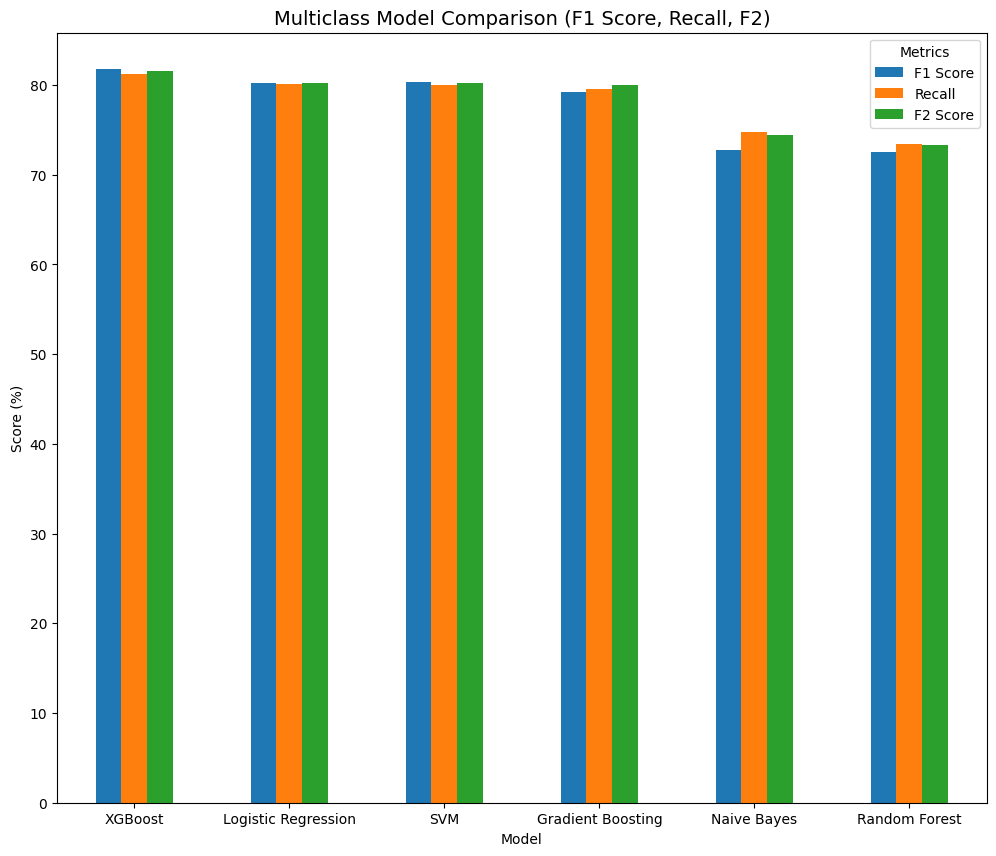

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Function to compute metrics + F2 Score (macro average)
def evaluate_model(name, y_test, y_pred, y_prob):
    acc = round(accuracy_score(y_test, y_pred)*100, 2)
    roc = round(roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")*100, 2)

    # Macro average
    prec = round(precision_score(y_test, y_pred, average="macro")*100, 2)
    rec = round(recall_score(y_test, y_pred, average="macro")*100, 2)
    f1 = round(f1_score(y_test, y_pred, average="macro")*100, 2)

    # F2 score for multiclass → calculated manually using the macro formula
    f2 = round(((5*prec*rec) / ((4*prec) + rec + 1e-9)), 2)

    return [name, acc, roc, prec, rec, f1, f2]

# Collect results
results_list = []
results_list.append(evaluate_model("Logistic Regression", y_test, y_pred_log, y_prob_log))
results_list.append(evaluate_model("Naive Bayes", y_test, y_pred_nb, y_prob_nb))
results_list.append(evaluate_model("Random Forest", y_test, y_pred_rf, y_prob_rf))
results_list.append(evaluate_model("Gradient Boosting", y_test, y_pred_gb, y_prob_gb))
results_list.append(evaluate_model("XGBoost", y_test, y_pred_xgb, y_prob_xgb))
results_list.append(evaluate_model("SVM", y_test, y_pred_svm, y_prob_svm))\

# DataFrame result
results_smote = pd.DataFrame(results_list,
                             columns=["Model", "Accuracy", "ROC AUC", "Precision", "Recall", "F1 Score", "F2 Score"])

# Sort by Recall dan F2 (imbalance multiclass)
results_smote = results_smote.sort_values(["Recall", "F2 Score"], ascending=False)

print("\nModel Comparison Results (Multiclass):")
print(results_smote)

# Visualization
results_smote.set_index("Model")[["F1 Score", "Recall", "F2 Score"]].plot(kind="bar", figsize=(12,10))
plt.title("Multiclass Model Comparison (F1 Score, Recall, F2)", fontsize=14)
plt.ylabel("Score (%)")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.show()

✅ Model Terbaik untuk Streamlit: Logistic Regression
Kenapa Cocok:

Akurasi tinggi (81.67%) dan F1 (81.77%) — mendekati Gradient Boosting.

Waktu prediksi sangat cepat, cocok untuk input teks real-time.

Model ringan, bisa di-load <1 detik dengan joblib.

Bekerja baik dengan TF-IDF (yang umumnya digunakan pada teks).

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': np.linspace(0.03, 0.2, 5),
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'reg_lambda': [0.5, 1, 2],
    'gamma': [0, 0.25, 0.5, 1]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1,
    random_state=0,
    verbose=2
)

random_search.fit(X_train, y_train)

print("Best Params:", random_search.best_params_)
print("Best F1 Score:", round(random_search.best_score_*100, 2), "%")

best_xgb = random_search.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Params: {'subsample': 0.8, 'reg_lambda': 1, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': np.float64(0.1575), 'gamma': 0.25, 'colsample_bytree': 1.0}
Best F1 Score: 81.07 %


In [ ]:
# XGBOOST
print(" XGBoost Model \n")
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1575,
    gamma=0.25,
    max_depth=4,
    subsample=0.8,
    reg_lambda=1,
    colsample_bytree=1,
    random_state=0,
    eval_metric="mlogloss"
)
xgb.fit(X_train, y_train)

# Evaluasi TRAIN
y_train_pred_xgb = xgb.predict(X_train)
y_train_prob_xgb = xgb.predict_proba(X_train)
train_acc_xgb = accuracy_score(y_train, y_train_pred_xgb)
train_roc_xgb = roc_auc_score(y_train, y_train_prob_xgb, multi_class="ovr", average="macro")

# Evaluasi TEST
y_test_pred_xgb = xgb.predict(X_test)
y_test_prob_xgb = xgb.predict_proba(X_test)
test_acc_xgb = accuracy_score(y_test, y_test_pred_xgb)
test_roc_xgb = roc_auc_score(y_test, y_test_prob_xgb, multi_class="ovr", average="macro")

print("TRAIN SET")
print("Accuracy:", round(train_acc_xgb*100, 2), "%")
print("ROC AUC :", round(train_roc_xgb*100, 2), "%")

print("\nTEST SET")
print("Accuracy:", round(test_acc_xgb*100, 2), "%")
print("ROC AUC :", round(test_roc_xgb*100, 2), "%")

print("\nGAP (Train - Test)")
print("Accuracy Gap:", round((train_acc_xgb - test_acc_xgb)*100, 2), "%")
print("ROC AUC Gap :", round((train_roc_xgb - test_roc_xgb)*100, 2), "%")

 XGBoost Model 

TRAIN SET
Accuracy: 84.83 %
ROC AUC : 97.64 %

TEST SET
Accuracy: 81.25 %
ROC AUC : 96.56 %

GAP (Train - Test)
Accuracy Gap: 3.57 %
ROC AUC Gap : 1.08 %


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score

# Model XGBoost with the best parameters
chosen_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1575,
    gamma=0.25,
    max_depth=4,
    subsample=0.8,
    reg_lambda=1,
    colsample_bytree=1,
    random_state=0,
    eval_metric="mlogloss"
)

#  Train the model with the training data.
chosen_model.fit(X_train, y_train)

y_pred = chosen_model.predict(X_test)
y_prob = chosen_model.predict_proba(X_test)

# Model Evaluation
print("\n Model Evaluation Results")
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("F1 Score (macro):", round(f1_score(y_test, y_pred, average='macro'), 3))
print("ROC AUC (multiclass):", round(roc_auc_score(y_test, y_prob, multi_class='ovr'), 3))

# Confusion Matrix
print("\n Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

# Detailed performance report for each class
print("\n Classification Report")
print(classification_report(y_test, y_pred))


 Model Evaluation Results
Accuracy: 81.25 %
F1 Score (macro): 0.816
ROC AUC (multiclass): 0.966

 Confusion Matrix
[[1543    5    1   40    9    0]
 [   1 1539    6   24   21    1]
 [   2    9 1284  169  125    1]
 [  18    9   52  999  470   39]
 [   5   10   59  601  884    6]
 [   0    2   11   61   30 1496]]

 Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1598
           1       0.98      0.97      0.97      1592
           2       0.91      0.81      0.86      1590
           3       0.53      0.63      0.57      1587
           4       0.57      0.56      0.57      1565
           5       0.97      0.94      0.95      1600

    accuracy                           0.81      9532
   macro avg       0.82      0.81      0.82      9532
weighted avg       0.82      0.81      0.82      9532



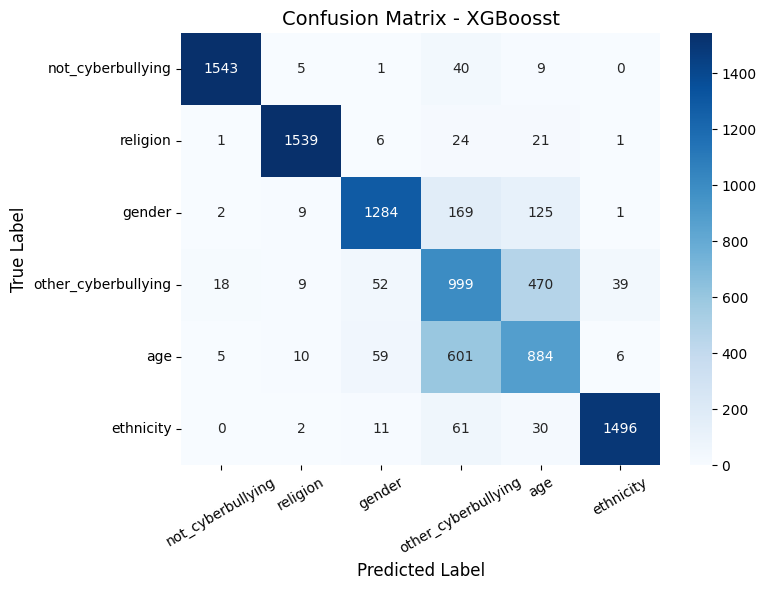

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# label
labels = ['not_cyberbullying', 'religion', 'gender', 'other_cyberbullying', 'age', 'ethnicity']

# Heatmap Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)

plt.title('Confusion Matrix - XGBoosst', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(rotation=30)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# Check Prediction by Chosen Model (Linear Regression)
user_input = "female"
X_input = tfidf.transform([user_input])
prediction = chosen_model.predict(X_input)
label = le.inverse_transform(prediction)

print("Prediction:", label[0])

Prediction: gender


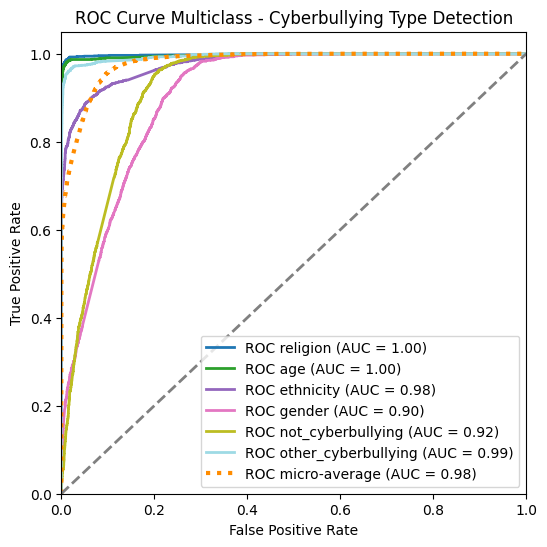

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Binarize y_test
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Calculate ROC & AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-average
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Visualization
plt.figure(figsize=(6, 6))
colors = plt.cm.get_cmap('tab20', n_classes).colors
class_names = ["religion", "age", "ethnicity", "gender", "not_cyberbullying", "other_cyberbullying"]

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"ROC {class_names[i]} (AUC = {roc_auc[i]:0.2f})")

# Micro-average ROC
plt.plot(fpr["micro"], tpr["micro"],
         label=f'ROC micro-average (AUC = {roc_auc["micro"]:0.2f})',
         color='darkorange', linestyle=':', linewidth=3)

# Diagonal
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Multiclass - Cyberbullying Type Detection')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# 1. check library version
import sklearn
import numpy
import pandas
import joblib
import seaborn
import matplotlib
import scipy
import plotly
import streamlit as st
import xgboost

print("VERSI LIBRARY SAAT TRAINING:")
print("scikit-learn:", sklearn.__version__)
print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)
print("joblib:", joblib.__version__)
print("seaborn:", seaborn.__version__)
print("nltk:", nltk.__version__)
print("matplotlib:", matplotlib.__version__)
print("scipy:", scipy.__version__)
print("streamlit:", st.__version__)
print("Plotly:", plotly.__version__)
print("XGBoost version:", xgboost.__version__)

print("-"*50)


VERSI LIBRARY SAAT TRAINING:
scikit-learn: 1.6.1
numpy: 2.0.2
pandas: 2.2.2
joblib: 1.5.2
seaborn: 0.13.2
nltk: 3.9.1
matplotlib: 3.10.0
scipy: 1.16.2
streamlit: 1.50.0
Plotly: 5.24.1
XGBoost version: 3.1.0
--------------------------------------------------


In [ ]:
# Save Model & Scaler
import joblib

# Save model and preprocessors
joblib.dump(chosen_model, "/content/drive/MyDrive/DScience-Project/Cyber Bullying/model_xgb_.pkl")
joblib.dump(tfidf, "/content/drive/MyDrive/DScience-Project/Cyber Bullying/tfidf_vectorizer.pkl")
joblib.dump(le, "/content/drive/MyDrive/DScience-Project/Cyber Bullying/label_encoder.pkl")
print("Model and scaler berhasil disimpan!")

Model dan scaler berhasil disimpan!
